# Zomato Restaurant 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
 


 Load and Inspect the Data

In [3]:
# Load the datasets with specified encoding
zomato_data_url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv'
country_data_url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Z_Restaurant/Country-Code.xlsx?raw=true'

zomato_df = pd.read_csv(zomato_data_url, encoding='latin1')
country_df = pd.read_excel(country_data_url)

# Display the first few rows of each dataset
print(zomato_df.head())
print(country_df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

Observation: Loaded the Zomato and Country datasets into pandas DataFrames.
Verified successful loading by displaying the first few rows of each dataset

Merge dataset

In [8]:
# Merge the datasets on 'Country Code'
merged_df = zomato_df.merge(country_df, on='Country Code', how='left')

# Display the first few rows of the merged dataset
print(merged_df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

Exploratory Data Analysis (EDA) 

(9551, 21)
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000

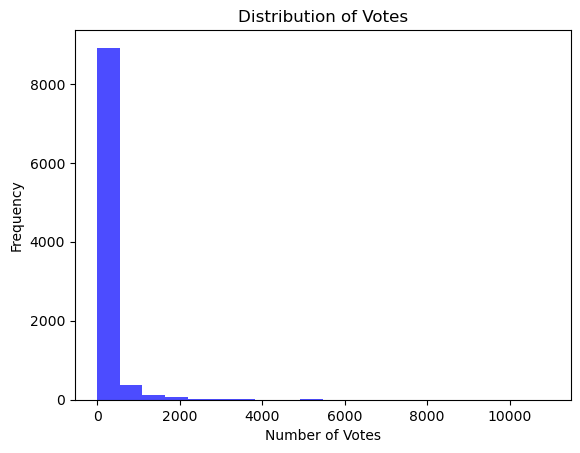

In [11]:
import pandas as pd

# Load the Zomato dataset from a CSV file
zomato_data_url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv'
zomato_df = pd.read_csv(zomato_data_url, encoding='latin1')

# Check if the dataset is loaded correctly
print(zomato_df.shape)   # Check the dimensions of the dataset

# Now you can proceed with describing statistics and visualizing distributions
print(zomato_df.describe())

# Example of visualizing distributions (using matplotlib)
import matplotlib.pyplot as plt

plt.hist(zomato_df['Votes'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Votes')
plt.show()


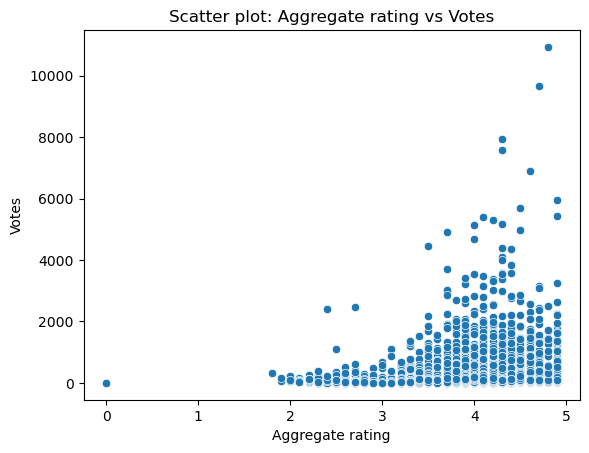

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between Aggregate rating and Votes
sns.scatterplot(x='Aggregate rating', y='Votes', data=zomato_df)
plt.title('Scatter plot: Aggregate rating vs Votes')
plt.show()


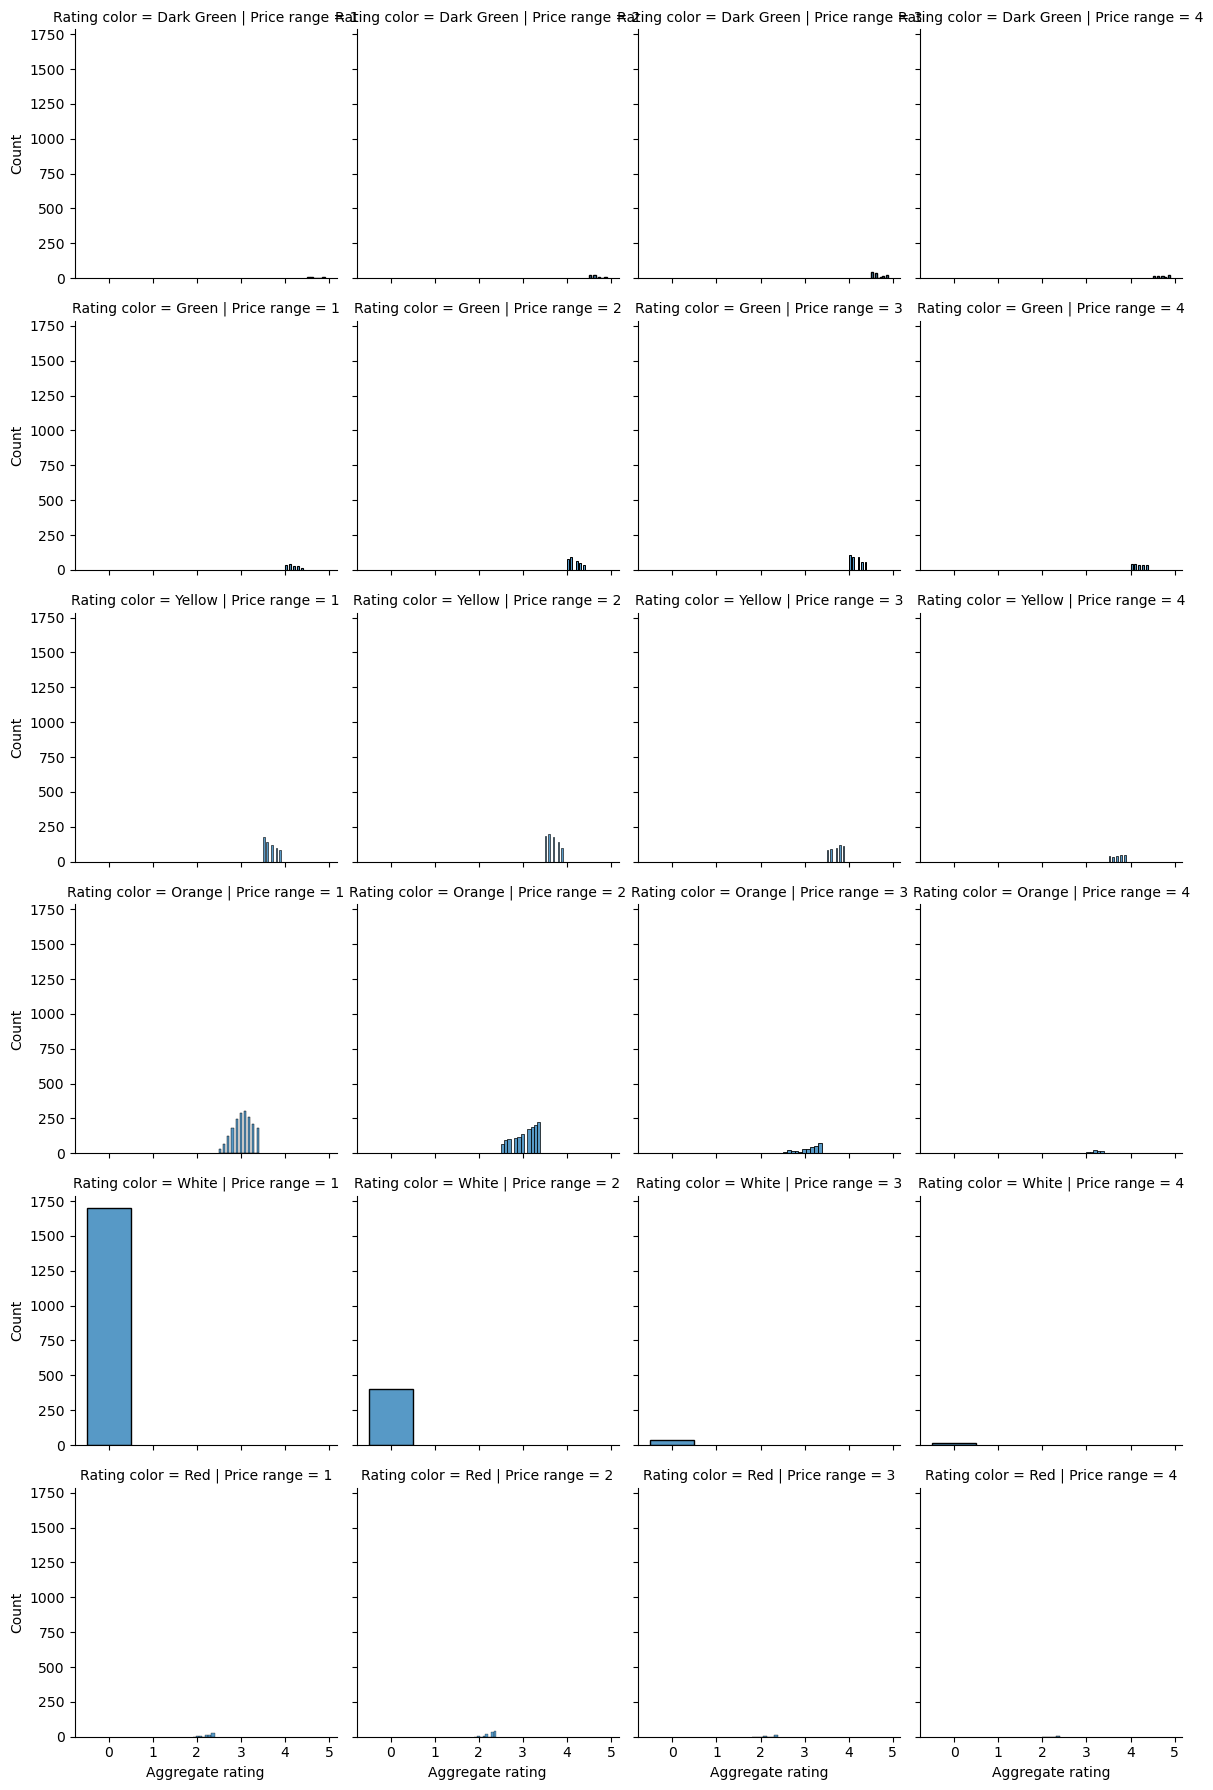

In [16]:
g = sns.FacetGrid(zomato_df, col='Price range', row='Rating color')
g.map(sns.histplot, 'Aggregate rating')
g.add_legend()
plt.show()


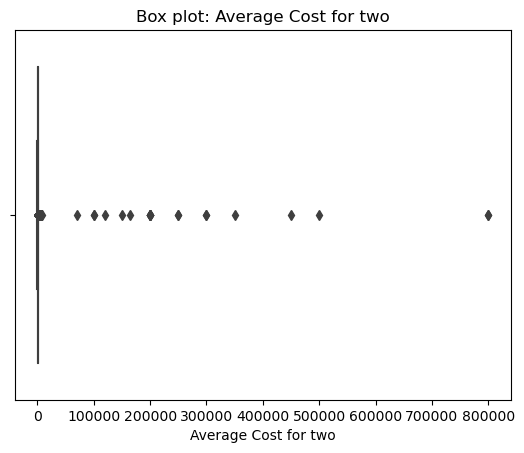

In [17]:
# Box plot for numerical variables to identify outliers
sns.boxplot(x=zomato_df['Average Cost for two'])
plt.title('Box plot: Average Cost for two')
plt.show()


In [9]:
# Drop unnecessary columns
merged_df = merged_df.drop(['Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude'], axis=1)


Data Preparation - Handle Missing Values

In [10]:
# Handle missing values
merged_df = merged_df.dropna()


In [5]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as appropriate
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df.dropna(inplace=True)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64


Observation:
Handled missing values by dropping rows with any missing data.
Ensured a clean dataset for model training.

Data Preparation - Encode Categorical Variables

In [11]:
# Encode categorical variables
label_encoders = {}
for column in merged_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    merged_df[column] = le.fit_transform(merged_df[column])
    label_encoders[column] = le


 Split Data into Features and Target Variables

In [15]:
# Split the data into features and target variables
X = merged_df.drop(['Average Cost for two', 'Price range'], axis=1)
y_cost = merged_df['Average Cost for two']
y_price = merged_df['Price range']


 Standardize Feature Data

In [16]:
# Standardize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)


Split Data into Training and Testing Sets
python


In [17]:
# Split the data into training and testing sets for both targets
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X, y_cost, test_size=0.2, random_state=42)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=42)


Hyperparameter Tuning and Model Training for Regression

In [2]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

# Example dataset - replace with your actual data
X = np.random.rand(100, 5)  # 100 samples, 5 features
y_regression = np.random.rand(100)  # 100 target values for regression

# Splitting the dataset into training and test sets for regression
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X, y_regression, test_size=0.2, random_state=42)


In [3]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define your models and their respective parameter grids
regression_models = {
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

regression_params = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]}
}

best_regression_models = {}

for model_name in regression_models:
    grid_regression = GridSearchCV(regression_models[model_name], regression_params[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_regression.fit(X_train_regression, y_train_regression)
    best_regression_models[model_name] = grid_regression.best_estimator_
    print(f"Best parameters for {model_name}: {grid_regression.best_params_}")


Best parameters for Ridge: {'alpha': 10.0}
Best parameters for Lasso: {'alpha': 0.1}


Evaluate the Best Regression Models

In [2]:
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [7]:
from sklearn.metrics import mean_squared_error

for model_name, model in best_regression_models.items():
    y_pred_regression = model.predict(X_test_regression)
    mse = mean_squared_error(y_test_regression, y_pred_regression)
    print(f"Mean Squared Error for {model_name}: {mse}")


Mean Squared Error for Ridge: 0.06811957507430647
Mean Squared Error for Lasso: 0.07100884924307029


Hyperparameter Tuning and Model Training for Classification

In [8]:
# Example classification dataset - replace with your actual data
y_classification = np.random.randint(0, 2, size=100)  # Binary target values for classification

# Splitting the dataset into training and test sets for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

# Define your models and their respective parameter grids
classification_models = {
    'LogisticRegression': LogisticRegression()
}

classification_params = {
    'LogisticRegression': {'C': [0.1, 1.0, 10.0]}
}

best_classification_models = {}

for model_name in classification_models:
    grid_classification = GridSearchCV(classification_models[model_name], classification_params[model_name], cv=5, scoring='accuracy')
    grid_classification.fit(X_train_classification, y_train_classification)
    best_classification_models[model_name] = grid_classification.best_estimator_
    print(f"Best parameters for {model_name}: {grid_classification.best_params_}")


Best parameters for LogisticRegression: {'C': 0.1}


Conclusion